##  How to Predict Housing Prices with Linear Regression 

<!-- <img src="./housing_boston.jpg"> -->

![](https://images.pexels.com/photos/5627116/pexels-photo-5627116.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

Photo by Andrés García from Pexels

### Problem Statement

The task at the end is to `predict` the price of some housing in the Boston suburb. The data was given by the [Boston Standard Metropolitan Statistical Area](https://www.kaggle.com/vikrishnan/boston-house-prices) in 1970. We will employ different techniques like **data pre-processing** and **feature engineering** to explore and transform the data. 

Afterward, we will use a statistical model like linear regression to `predict` the **housing market** and interpret the `model`.

## Table of Contents

1. EDA
2. Feature engineering
3. Pick and Train a Model
4. Interpret the Model
6. Conclusion

In [2]:
## Install the libraries

In [3]:
# !pip install plotly --quiet

In [361]:
# Import the libraries 

#Dataframe/Numerical libraries
import pandas as pd 
import numpy as np

#Data visualization 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning model 
from sklearn.linear_model import LinearRegression 

<h3 style="color:#FFC300;background-color:#FF5733";>
    EDA (Exploratoray Data Analysis)
<br>
</h3>

The `EDA` is an adequate process to go through before applying a `statistical model` to:
- **Understand the dataset** 
- **Check if some data is missing**
- **Detect some outliers**
- **Add, transform or remove some features to get more out of the data**

In [362]:
#Reading the data
path='./housing.csv'
housing_df=pd.read_csv(path,header=None,delim_whitespace=True)

In [363]:
columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [364]:
housing_df.columns=columns

In [365]:
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Columns

**Crime**: It refers to the per capita crime rate by town

**ZN**: It refers to the proportion of residential land zoned for 25,000 sq. ft

**Indus**: Indus refers to the proportion of non-retail business acres per town

**CHAS**: CHAS refers to if the land is bounded or not to the river

**NOX**: The NOX refers to the concentration of nitric oxides (part per 10m)

**RM**: RM  refers to the average number of rooms per dwelling

**AGE**: AGE refers to the proportion of owner-occupied units built before 1940.

**DIS**: Dis  refers to weighted distances to five Boston employment centers

**RAD**: index of accessibility to radial highways

**TAX**: TAX columns refer to full-value property-tax rate per 10,000 dollars

**PTRATIO** : It refers to the pupil-teacher ratio by town

**B** : The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT**: it refers to the lower status of the population

**MEDV**: it refers to the Median value of owner-occupied homes in 1000 dollars

In [366]:
# Check if there is any missing values.
housing_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [367]:
#To check the data type of each columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


All our data is of numeric value

In [369]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**inference**
1. The crime, zone, industry, nitric oxides, 'B' seem to have several outliers due to fact that they have a big jump between the min and the max. The mean and the Q2(50 percentile) do not match up in the Age columns.

2. The mean of the owner-occupied property is 28 years



In [370]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

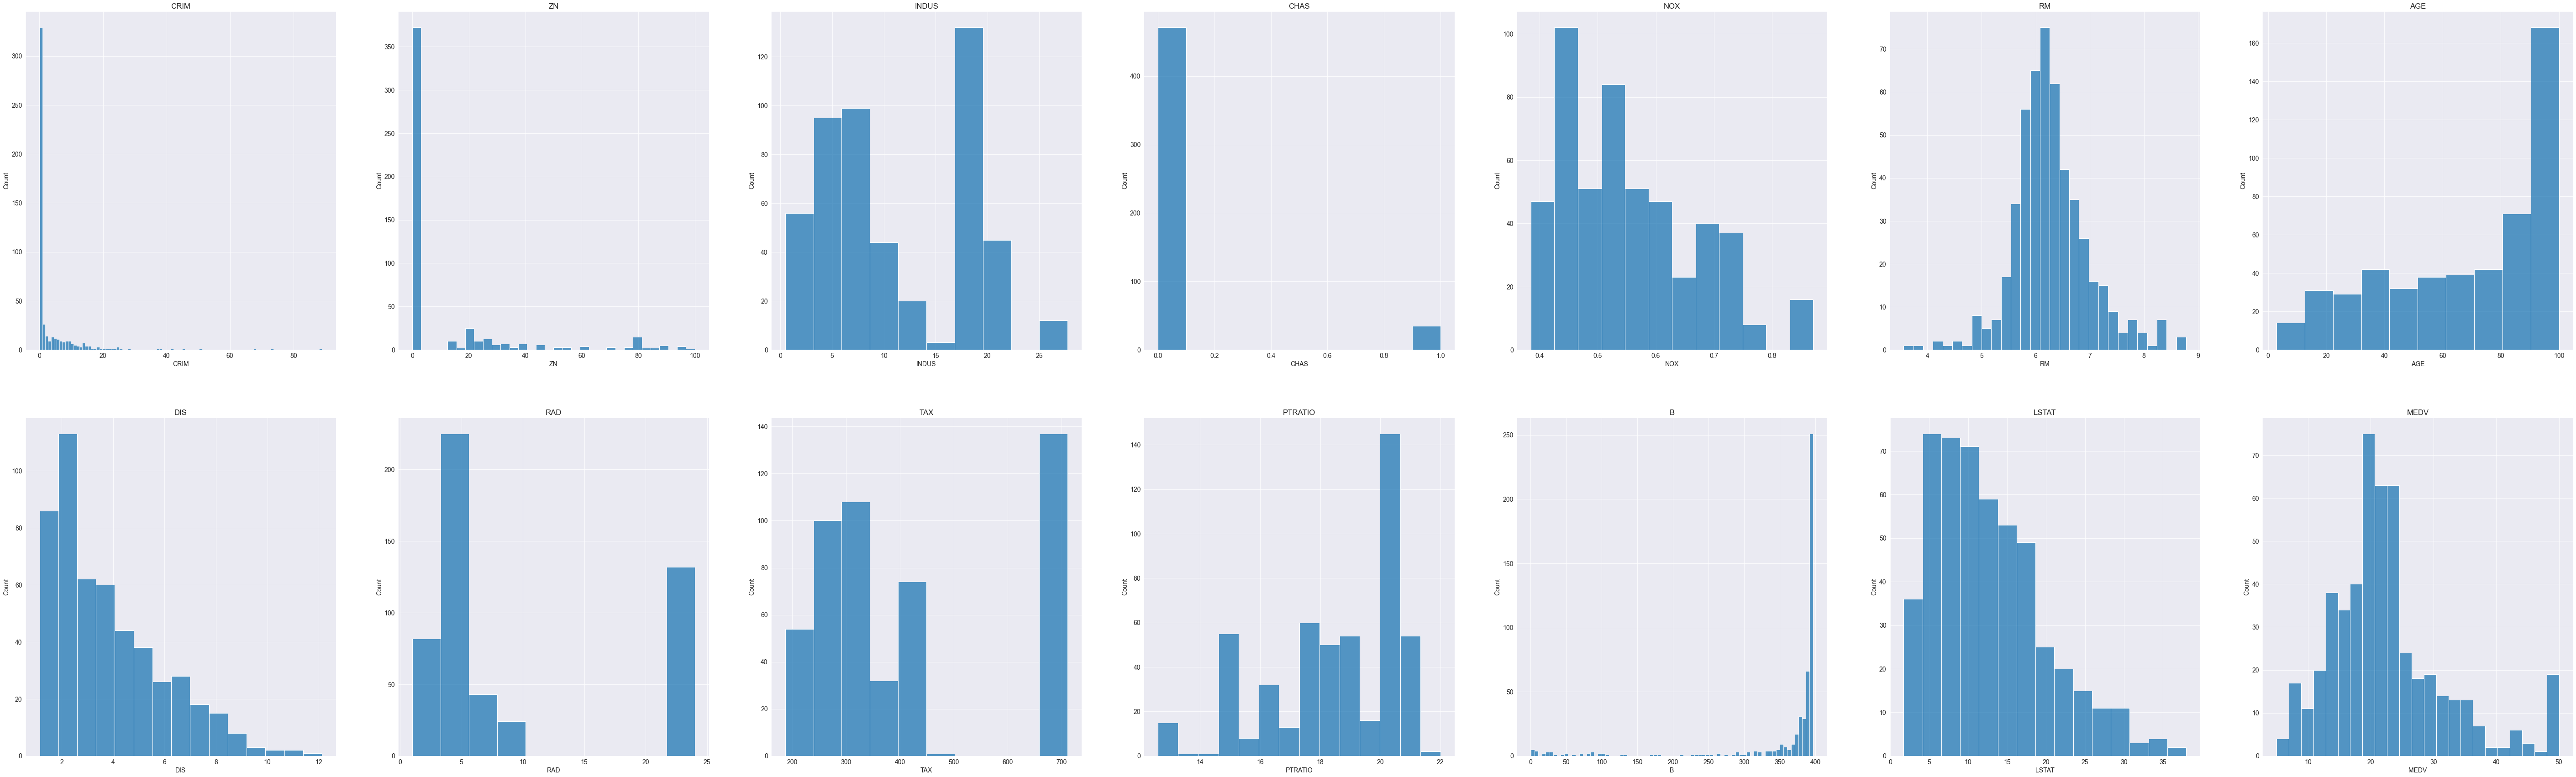

In [372]:
fig,ax=plt.subplots(2,7,figsize=(100,30))
j=0
d=0
part1=housing_df.columns[0:7]
part2=housing_df.columns[7:14]

for k in part2:
    for i in part1:
        if j<7:
            ax[0,j].set_title(i)
            sns.histplot(data=housing_df,x=i,ax=ax[0,j])
            j+=1
    if d<7:
        ax[1,d].set_title(k)
        sns.histplot(data=housing_df,x=k,ax=ax[1,d])
        d+=1

####     Inferences
   1) The `crime rate` is fairly low. Most values reside in 0 to 25. With a large value with 0 value
   
   2) Most `residential land` zoned are less than 25,000 sqft. Land zones that are over 25,000 sqft represent a very parse sample of the dataset
    
   3) The proportion of `non-retail business` acres is mainly distributed among 2 range 0-13 and 13-23
    
   4) Most of the properties are bounded the `river` and a small amount of data does not
    
   5) The concentration of [nitrite dioxide](https://nj.gov/health/eoh/rtkweb/documents/fs/1376.pdf) follows a downwards trend from .3 to .7 with a small bum towards .8. The value between 0.1-1 is acceptable to leave in.
    
   6) The number of `rooms` concentrates around the mean
    
   7) The proportion of `owner-occupied units` increases with time
    
   8) The weight distance between 5 employment centers decreases as far as the number of weight increases. It might mean people tend to dwell new high `employment center`
    
   9) `People` tend to dwell in areas where the accessibility to `highways` is low(0-10). We have an outlier in the range of 30
    
   10) Most `taxes` of dwelling  are between the range 200-450 with big outliers around `700k dollars`
    
   11) `Lower status percentage` concentrates around the median. Most people are of lower status

## Preprocessing

Removing all outliers will underfit the model being too generalized. Keeping all outliers will overfit the model being too accurate. It will learn the noise of the data.

The solution is to find the happy medium so that the model does not become too accurate. However, generalize well when presented a new set of data.

In [373]:
new_df=housing_df[housing_df['TAX']<600]


In [374]:
new_df.shape

(369, 14)

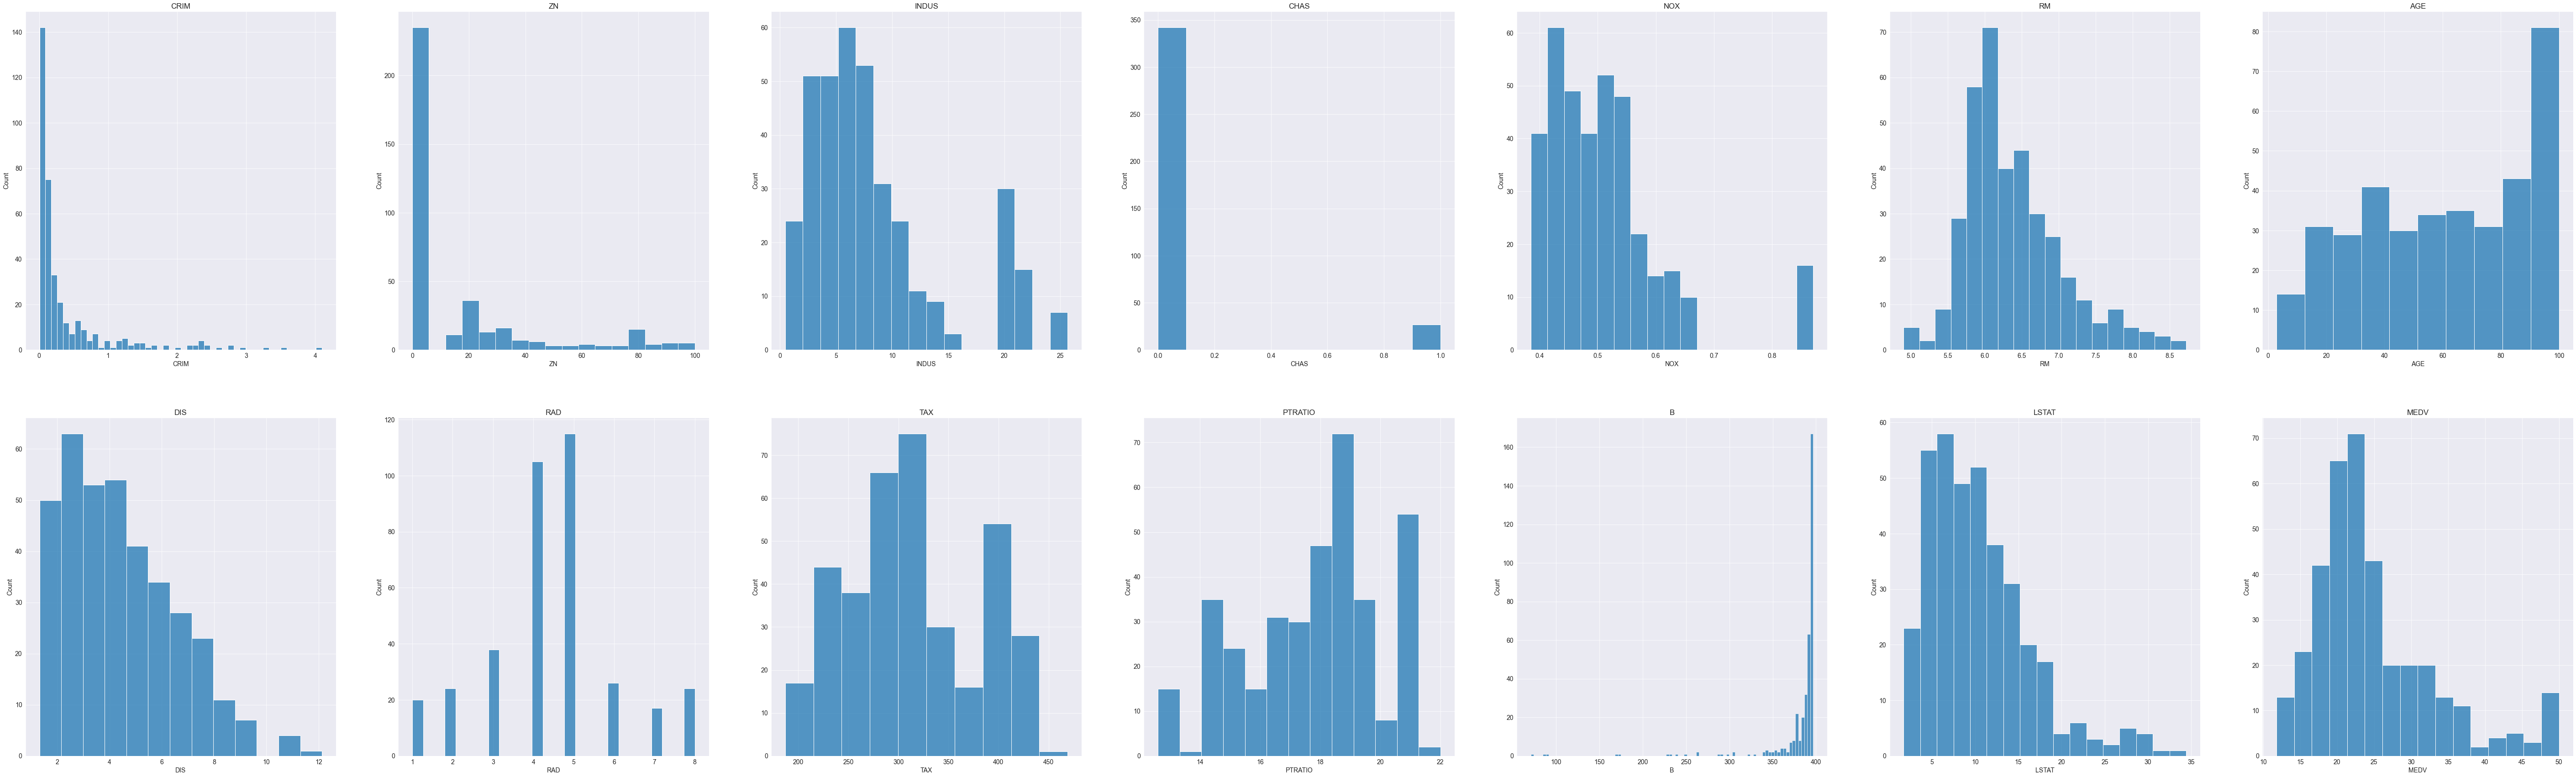

In [375]:
fig,ax=plt.subplots(2,7,figsize=(100,30))
j=0
d=0
part1=new_df.columns[0:7]
part2=new_df.columns[7:14]

for k in part2:
    for i in part1:
        if j<7:
            ax[0,j].set_title(i)
            sns.histplot(data=new_df,x=i,ax=ax[0,j])
            j+=1
    if d<7:
        ax[1,d].set_title(k)
        sns.histplot(data=new_df,x=k,ax=ax[1,d])
        d+=1

## Correlation

<AxesSubplot:title={'center':'Correlation Matrix'}>

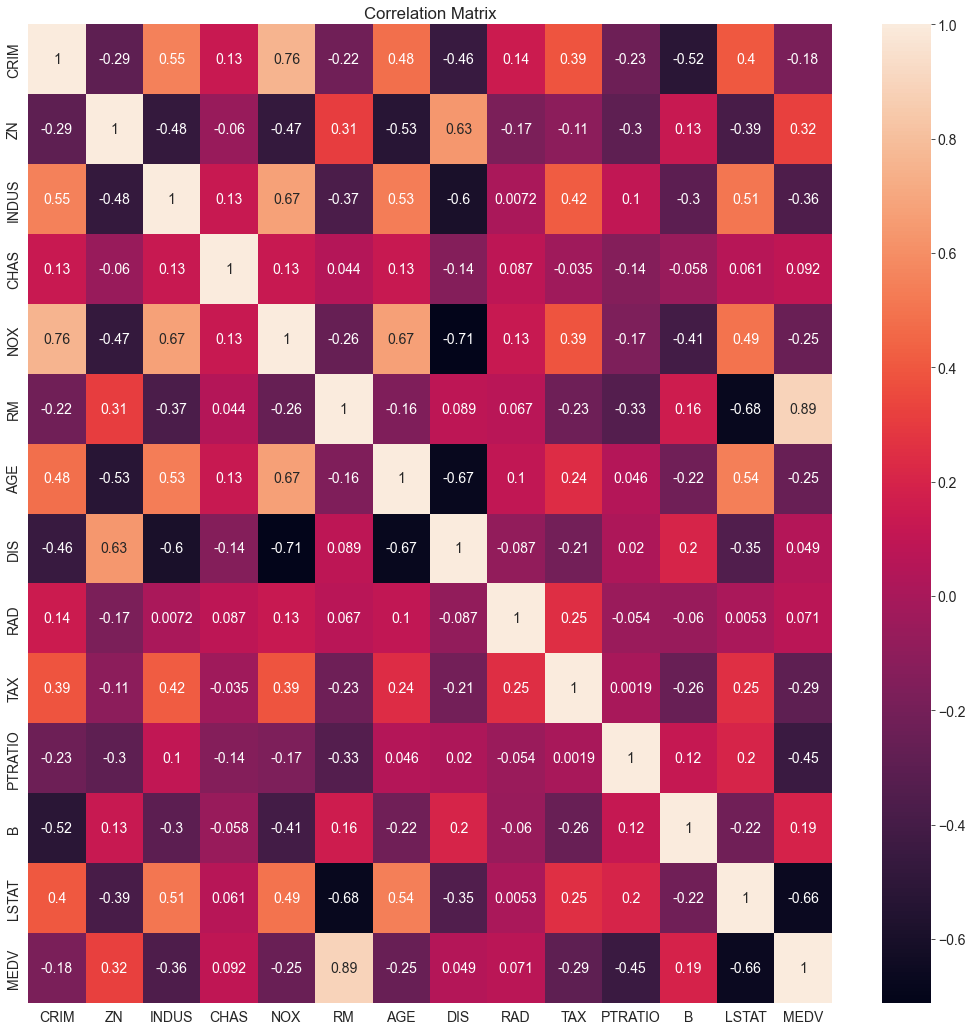

In [376]:
# correlation 
plt.figure(figsize=(18,18))
plt.title('Correlation Matrix')
sns.heatmap(new_df.corr(),annot=True)

In [377]:
high_corr=new_df.corr().MEDV.sort_values(ascending=False) #Create a correlation matrix
high_corr_var=[] # create a variable to store the name

# loop through to the name
for name in high_corr.index:
    high_corr_var.append(name)# store the name into the variable 

high_corr_var.pop(0) # remove the 'MEDV' from the list
# high_corr_var

'MEDV'

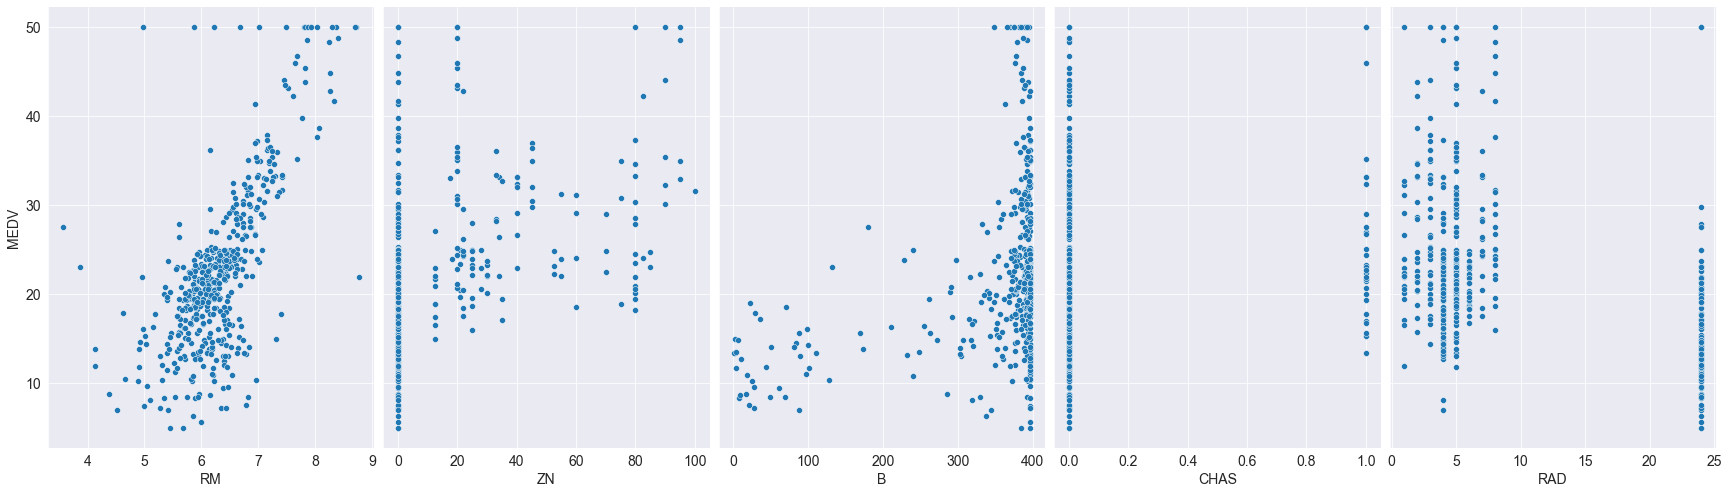

In [382]:
sns.pairplot(data=housing_df,x_vars=['RM','ZN','B','CHAS','RAD'],y_vars='MEDV',height=7,aspect=.7);

In [383]:
# fig=px.scatter(housing_df,x=['RM','ZN','B','CHAS','RAD'],y='MEDV',title='feature vs Price',opacity=.7)
# fig.update_layout(width=900,height=500)
# fig.show()


In [225]:
# fig=px.scatter_3d(housing_df,x='RM',y='ZN',z='MEDV',size_max=8,opacity=.6)
# fig.update_layout(width=1080,height=600)
# fig.show()

In [384]:
#Create a list of features
cols_inputs=list(housing_df.columns)
cols_inputs.pop()
# df.drop(columns='MEDV', inplace=True)
X=new_df[cols_inputs]
y=new_df['MEDV']

## Feature Scaling

**Feature scaling** facilitates gradient descent by making sure that the features are on the same scale. It makes it easier to find the local optimum.

One technique to use is **mean normalization**. It replaces the target with (target-mean) to make sure the feature has approximately zero mean.

In [385]:
def standard(X):
    '''Standard makes the feature 'X' have a zero mean'''
    mu=np.mean(X) #mean
    std=np.std(X) #standard deviation
    sta=(X-mu)/std # mean normalization
    return mu,std,sta 
    

In [387]:
mu,std,sta=standard(X)
X=sta
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.609129,0.092792,-1.019125,-0.280976,0.258670,0.279135,0.162095,-0.167660,-2.105767,-0.235130,-1.136863,0.401318,-0.933659
1,-0.575698,-0.598153,-0.225291,-0.280976,-0.423795,0.049252,0.648266,0.250975,-1.496334,-1.032339,-0.004175,0.401318,-0.219350
2,-0.575730,-0.598153,-0.225291,-0.280976,-0.423795,1.189708,0.016599,0.250975,-1.496334,-1.032339,-0.004175,0.298315,-1.096782
3,-0.567639,-0.598153,-1.040806,-0.280976,-0.532594,0.910565,-0.526350,0.773661,-0.886900,-1.327601,0.403593,0.343869,-1.283945
4,-0.509220,-0.598153,-1.040806,-0.280976,-0.532594,1.132984,-0.228261,0.773661,-0.886900,-1.327601,0.403593,0.401318,-0.873561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.519445,-0.598153,0.585220,-0.280976,0.604848,0.306004,0.300494,-0.936773,-2.105767,-0.574682,1.445666,0.277056,-0.128344
502,-0.547094,-0.598153,0.585220,-0.280976,0.604848,-0.400063,0.570195,-1.027984,-2.105767,-0.574682,1.445666,0.401318,-0.229652
503,-0.522423,-0.598153,0.585220,-0.280976,0.604848,0.877725,1.077657,-1.085260,-2.105767,-0.574682,1.445666,0.401318,-0.820331
504,-0.444652,-0.598153,0.585220,-0.280976,0.604848,0.606046,1.017329,-0.979587,-2.105767,-0.574682,1.445666,0.314006,-0.676095


In [388]:
X=new_df[['RM']]
mu,std,sta=standard(X)
X=sta
X

,RM
0,0.279135
1,0.049252
2,1.189708
3,0.910565
4,1.132984
...,...
501,0.306004
502,-0.400063
503,0.877725
504,0.606046


<h3 style='color:#FFC300; background-color:#FF5733';>
    PICK AND TRAIN THE MODEL
<br>
</h3>

We will use linear regression for the sake of the project.

Usually, we run multiple models and choose the most appropriate ones depending on a different metric.

**Linear regression** as its related to machine learning is a type of supervised learning model in which the response is continuous

## Form of linear regression 

y= θX+θ1

or

y= θ1+X1θ2 +X2θ3 + X3θ4

`y` is the **target**

`θ` is the **coefficient**

`X` is the **input**


In [389]:
#Import the libraries to train the model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

Let's use the `train/test` method to train a portion of the data with one set and predict using another set.

In [390]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [391]:
#Create and Train the model
model=LinearRegression().fit(X_train,y_train)

#Generate prediction
predictions_test=model.predict(X_test)
#Compute loss to evaluate the model
coefficient= model.coef_
intercept=model.intercept_
print(coefficient,intercept)

[7.22218258] 24.66379606613584


In our case, we begin to train our model with the following hypothesis:

**Price**  = 24.85 + 7.18*ROOM

It is interpreted as:

For a given price of a house:

A unit **increase** in the `number of rooms` is **associated** with a 7.18 unit **increase** in the **price**.

As a side note, it is an association that is not causation!

In [392]:
high_corr_var

['RM',
 'ZN',
 'B',
 'CHAS',
 'RAD',
 'DIS',
 'CRIM',
 'NOX',
 'AGE',
 'TAX',
 'INDUS',
 'PTRATIO',
 'LSTAT']

<h3 style="color:#FFC300;background-color:#FF5733";>
    INTERPRET 
<br>
</h3>

We need an evaluation metric to evaluate if our hypothesis was correct. We will use **RMSE** method

## Root Mean Square Error

**Root Mean Square Error** (RMSE) is the square root of the mean of square error. The `error` is the difference between the true and predicted values. It is often used because it is interpretable in the `y-units` which is in our case the median price a house.

In [393]:
def rmse(predict,actual):
    return np.sqrt(np.mean(np.square(predict - actual)))

In [394]:
# Split the Data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
#Create and Train the model
model=LinearRegression().fit(X_train,y_train)

#Generate prediction
predictions_test=model.predict(X_test)

#Compute loss to evaluate the model
coefficient= model.coef_
intercept=model.intercept_
print(coefficient,intercept)

loss=rmse(predictions_test,y_test)
print('loss: ',loss)
print(model.score(X_test,y_test)) #accuracy

[7.43327725] 24.912055881970886
loss:  3.9673165450580714
0.7552661033654667


<h3 style="color:#FFC300;background-color:#FF5733";>
    IMPROVE THE MODEL 
<br>
</h3>

We will loop through each `parameter` to help us choose the **numbers features** to use in our model with **Forward Selection**

**Forward Selection**
1. Identify the best variable (in our case based on high correlation)
2. Add the next best variable into the model
3. And so on until some predefined criteria are satisfied

In [395]:
cols=[]
los=[]
scor=[]

i=0
while i < len(high_corr_var):
    cols.append(high_corr_var[i])
    
    # Select inputs variables
    X=new_df[cols]
    
    #mean normalization
    mu,std,sta=standard(X)
    X=sta
    
    # Split the data into training and testing
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)
    
    #fit the model to the training
    lnreg=LinearRegression().fit(X_train,y_train)
    
    #make prediction on the testing test
    prediction=lnreg.predict(X_test)
    
    #compute the loss
    loss=rmse(prediction,y_test)
    los.append(loss)
    
    #compute the score
    score=lnreg.score(X_test,y_test)
    scor.append(score)
    
    i+=1


In [396]:
# print(los)
# print(min(los))
# print('\n',scor)
# print(max(scor))

In [397]:
# high_corr_var


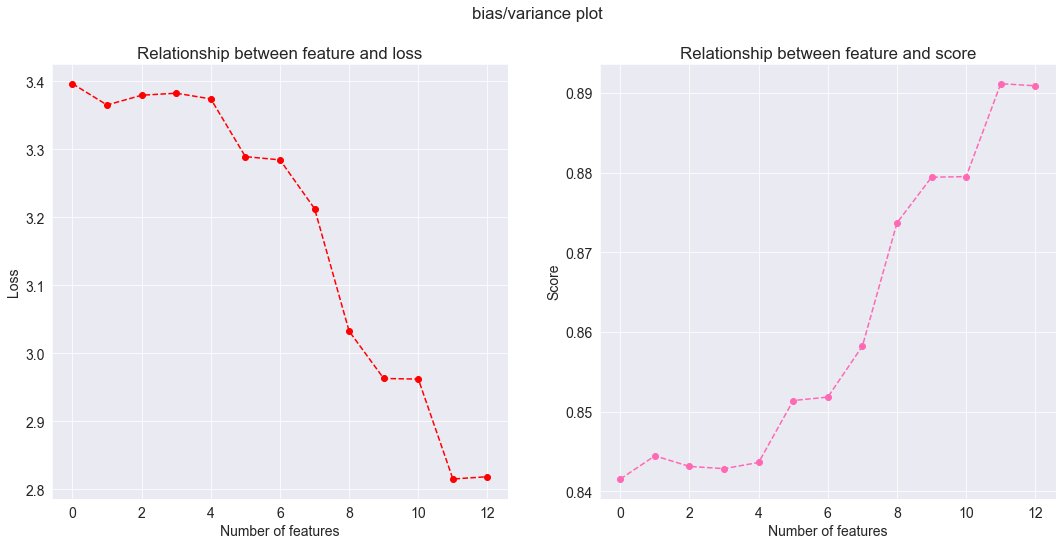

In [398]:
feature=np.arange(13)
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(18,8))
fig.suptitle('bias/variance plot')
# plot the relationship between feature and the loss
#axes for plotting
ax1.plot(feature,los,'r--o')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Loss')
ax1.set_title('Relationship between feature and loss')

#plot the relationship between feature and the score
#axes for plotting
ax2.plot(feature,scor,c='hotpink',marker='o',ls='--')
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Score')
ax2.set_title('Relationship between feature and score')

plt.show()


In [399]:

# plt.plot(feature,los,'r--o')
# plt.xlabel('Number of features')
# plt.ylabel('Loss')
# plt.title('bias/variance plot')

In [400]:
high_corr_var


['RM',
 'ZN',
 'B',
 'CHAS',
 'RAD',
 'DIS',
 'CRIM',
 'NOX',
 'AGE',
 'TAX',
 'INDUS',
 'PTRATIO',
 'LSTAT']

In [401]:
# Create a list of features names
feature_cols=['RM','ZN','B','CHAS','RAD','CRIM','DIS','NOX']

#Select inputs variables
X=new_df[feature_cols]

# Split the data into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=1)

# feature engineering
mu,std,sta=standard(X)
X=sta

# fit the model to the trainning data
lnreg=LinearRegression().fit(X_train,y_train)

# make prediction on the testing test
prediction=lnreg.predict(X_test)

# compute the loss
loss=rmse(prediction,y_test)

print('loss: ',loss)
lnreg.score(X_test,y_test)

loss:  3.212659865936143


0.8582338376696363

In [402]:
weights_df=pd.DataFrame({'feature':np.append(feature_cols,1),
                        'weights':np.append(lnreg.coef_,lnreg.intercept_)})
weights_df.sort_values('weights',ascending=False)

,feature,weights
0,RM,10.289260
3,CHAS,1.635169
5,CRIM,1.399639
4,RAD,0.064212
1,ZN,0.038915
2,B,0.019075
6,DIS,-0.680032
7,NOX,-12.434330
8,1,-40.478891


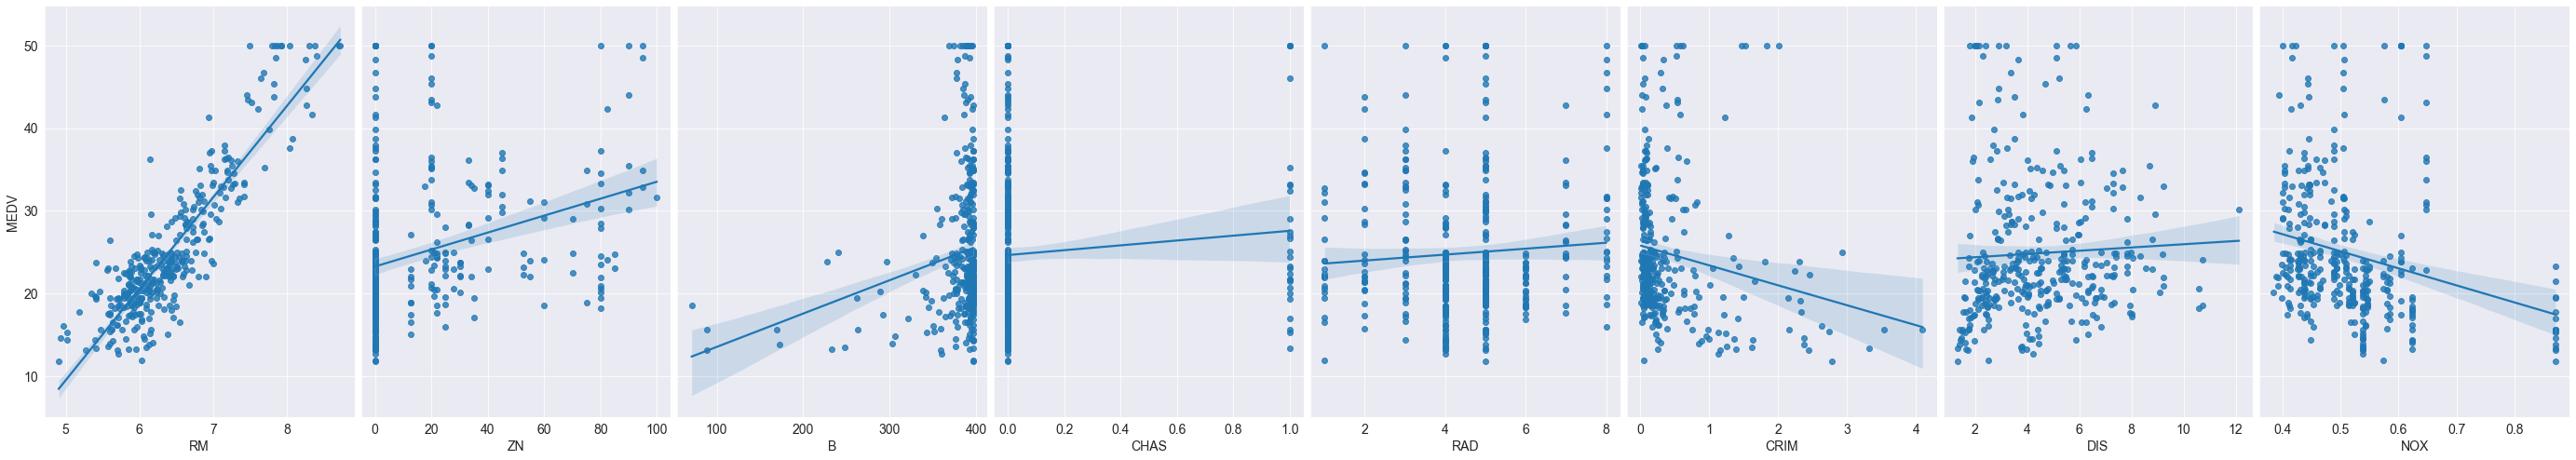

In [403]:
sns.pairplot(data=new_df,x_vars=feature_cols,y_vars='MEDV',height=7,aspect=0.7,kind='reg');

In [404]:
reg_corr=new_df[feature_cols +['MEDV']].corr()
reg_corr

,RM,ZN,B,CHAS,RAD,CRIM,DIS,NOX,MEDV
RM,1.000000,0.308619,0.155154,0.043789,0.067212,-0.220555,0.088672,-0.263575,0.889269
ZN,0.308619,1.000000,0.127976,-0.060212,-0.171166,-0.292718,0.633651,-0.471940,0.320577
B,0.155154,0.127976,1.000000,-0.058096,-0.059954,-0.523279,0.202948,-0.410883,0.191161
CHAS,0.043789,-0.060212,-0.058096,1.000000,0.086933,0.134326,-0.142665,0.125781,0.091612
RAD,0.067212,-0.171166,-0.059954,0.086933,1.000000,0.144810,-0.087367,0.130075,0.070698
CRIM,-0.220555,-0.292718,-0.523279,0.134326,0.144810,1.000000,-0.457143,0.756747,-0.181534
DIS,0.088672,0.633651,0.202948,-0.142665,-0.087367,-0.457143,1.000000,-0.711938,0.049400
NOX,-0.263575,-0.471940,-0.410883,0.125781,0.130075,0.756747,-0.711938,1.000000,-0.250309
MEDV,0.889269,0.320577,0.191161,0.091612,0.070698,-0.181534,0.049400,-0.250309,1.000000


<AxesSubplot:>

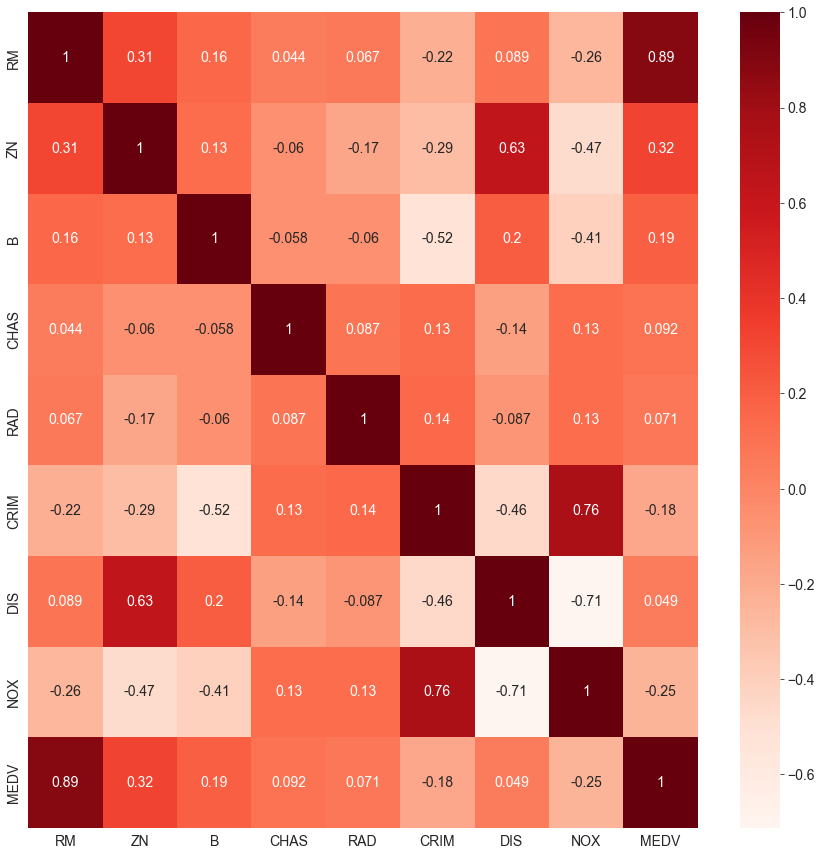

In [405]:
plt.figure(figsize=(15,15))
sns.heatmap(reg_corr,annot=True,cmap='Reds')

<h3 style="color:#FFC300;background-color:#FF5733";>
    CONCLUSION 
<br>
</h3>

## Inferences

- We have learned a lot through this project.

- A good `EDA` is necessary before implementing a model.

- `Data pre-processing` and `feature engineering` can help us transform our data for a smooth implementation

- Having a `Train/Test` set is useful due to its flexibility. However, it provides a `high variance` due to out-of-sample accuracy.

- The model will generalize more(underfit) as the model complexity decreases. The model will become too accurate(overfit) having learned the noise of the data as the model complexity increases.

- The process of `preprocessing`, `checking the distribution`, `feature engineering`, `model iteration` is an **iterative process**.

- **Linear regression** is `fast`, `interpretable` , and `well understood`. however, it is may not be the best predictive accuracy as it assumes a linear relationship between the inputs and the target



## Future Work

* Separately treating the `outliers` in some columns to have good `distribution` of the data.

* Use `regularization` to keep all the features and reduce the magnitude of the parameters.

* Improve the model by tweaking other parameters like `alpha`(learning parameters) and `number of iterations`.

* Use the `cross-validation` instead of the train/test method to overcome high variance.

* Create the `linear regression` from scratch using Python, Numpy ,and Pandas without Sklearn


## References

`coursera`: https://www.coursera.org/learn/machine-learning

`Data School`: https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6

`jovian`: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms

`kaggle`: https://www.kaggle.com/vikrishnan/boston-house-prices